In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from keras.callbacks import EarlyStopping
%matplotlib inline

seed_value = 12345
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

In [3]:
train = pd.read_csv('training.csv', names=['open', 'high', 'low', 'close'])
test = pd.read_csv('testing.csv', names=['open', 'high', 'low', 'close'])
all_data = train.append(test)


In [4]:
print(train.info())
print(train.describe())
print(test.info())
print(test.describe())
print(all_data.info())
print(all_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1488 non-null   float64
 1   high    1488 non-null   float64
 2   low     1488 non-null   float64
 3   close   1488 non-null   float64
dtypes: float64(4)
memory usage: 46.6 KB
None
              open         high          low        close
count  1488.000000  1488.000000  1488.000000  1488.000000
mean    172.964288   174.124227   171.883642   173.011888
std      21.865051    21.946438    21.838432    21.891710
min     118.460000   119.660000   116.900000   117.850000
25%     154.187500   155.315000   153.177500   154.125000
50%     173.925000   174.985000   172.975000   174.010000
75%     192.002500   193.257500   190.932500   192.090000
max     215.380000   215.900000   214.300000   215.800000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #

In [5]:
fig = px.line(test, x=test.index, y=['open', 'close','high', 'low'])
fig.update_layout(title='IBM\'s stock', xaxis_title='day', yaxis_title='price')
fig.show()

In [6]:
fig = px.line(test, x=test.index, y=['open', 'high','low', 'close'])
fig.update_layout(title='IBM\'s stock', xaxis_title='day', yaxis_title='price')
fig.show()

In [7]:
def create_data(data, past = 7, future = 7):
    x_train = []
    y_train = []
    for i in range(0, len(data)-past-future+1):
        t = data.iloc[i:i+past][['open', 'high', 'low', 'close']]
        y = data['open'].iloc[i+past:i+past+future]

        x_train.append(t)
        y_train.append(y)

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    return x_train, y_train
x, y = create_data(train, 5, 1)
print(x.shape)
print(y.shape)
print(x[-1])
print(y[-1])

(1483, 5, 4)
(1483, 1)
[[152.   152.39 151.33 151.77]
 [151.95 152.2  151.33 151.84]
 [152.06 152.49 151.62 151.98]
 [152.35 152.93 151.7  152.47]
 [152.81 153.61 152.17 153.55]]
[153.65]


In [8]:
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(10, input_length=shape[1], input_dim=shape[2], return_sequences=False))
    model.add(Dense(units = 10))
    model.add(Dropout(0.1))
    model.add(Dense(units = 10))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

In [9]:
callback = EarlyStopping(monitor="loss", patience=200, verbose=1, mode="auto")
x_train, y_train = create_data(train,3, 1)
print(x_train.shape)
print(y_train.shape)
regressor3 = buildManyToOneModel(x_train.shape)
# 進行訓練
regressor3.fit(x_train, y_train, epochs = 3000, callbacks=[callback])

ep - loss: 303.9936
Epoch 1122/3000
47/47 [==============================] - 0s 2ms/step - loss: 291.5516
Epoch 1123/3000
47/47 [==============================] - 0s 2ms/step - loss: 315.4799
Epoch 1124/3000
47/47 [==============================] - 0s 2ms/step - loss: 284.0475
Epoch 1125/3000
47/47 [==============================] - 0s 2ms/step - loss: 316.2622
Epoch 1126/3000
47/47 [==============================] - 0s 2ms/step - loss: 305.1473
Epoch 1127/3000
47/47 [==============================] - 0s 2ms/step - loss: 288.2972
Epoch 1128/3000
47/47 [==============================] - 0s 2ms/step - loss: 293.4073
Epoch 1129/3000
47/47 [==============================] - 0s 2ms/step - loss: 314.2454
Epoch 1130/3000
47/47 [==============================] - 0s 3ms/step - loss: 288.6064
Epoch 1131/3000
47/47 [==============================] - 0s 2ms/step - loss: 316.1881
Epoch 1132/3000
47/47 [==============================] - 0s 2ms/step - loss: 311.3116
Epoch 1133/3000
47/47 [===========

In [10]:
callback = EarlyStopping(monitor="loss", patience=200, verbose=1, mode="auto")
x_train, y_train = create_data(train,2, 1)
regressor2 = buildManyToOneModel(x_train.shape)
# 進行訓練
regressor2.fit(x_train, y_train, epochs = 3000, callbacks=[callback])

ep - loss: 271.3678
Epoch 1403/3000
47/47 [==============================] - 0s 2ms/step - loss: 262.1912
Epoch 1404/3000
47/47 [==============================] - 0s 2ms/step - loss: 280.9819
Epoch 1405/3000
47/47 [==============================] - 0s 2ms/step - loss: 281.0348
Epoch 1406/3000
47/47 [==============================] - 0s 2ms/step - loss: 258.9772
Epoch 1407/3000
47/47 [==============================] - 0s 2ms/step - loss: 258.8785
Epoch 1408/3000
47/47 [==============================] - 0s 2ms/step - loss: 281.3795
Epoch 1409/3000
47/47 [==============================] - 0s 2ms/step - loss: 248.3226
Epoch 1410/3000
47/47 [==============================] - 0s 2ms/step - loss: 257.8812
Epoch 1411/3000
47/47 [==============================] - 0s 2ms/step - loss: 270.1436
Epoch 1412/3000
47/47 [==============================] - 0s 2ms/step - loss: 258.0262
Epoch 1413/3000
47/47 [==============================] - 0s 2ms/step - loss: 272.4986
Epoch 1414/3000
47/47 [===========

In [11]:
callback = EarlyStopping(monitor="loss", patience=200, verbose=1, mode="auto")
x_train, y_train = create_data(train,4, 1)
regressor4 = buildManyToOneModel(x_train.shape)
# 進行訓練
regressor4.fit(x_train, y_train, epochs = 3000, callbacks=[callback])

ep - loss: 303.2615
Epoch 1166/3000
47/47 [==============================] - 0s 2ms/step - loss: 294.0308
Epoch 1167/3000
47/47 [==============================] - 0s 3ms/step - loss: 307.9169
Epoch 1168/3000
47/47 [==============================] - 0s 3ms/step - loss: 314.3952
Epoch 1169/3000
47/47 [==============================] - 0s 2ms/step - loss: 261.8266
Epoch 1170/3000
47/47 [==============================] - 0s 3ms/step - loss: 293.8497
Epoch 1171/3000
47/47 [==============================] - 0s 3ms/step - loss: 290.9829
Epoch 1172/3000
47/47 [==============================] - 0s 3ms/step - loss: 330.5795
Epoch 1173/3000
47/47 [==============================] - 0s 3ms/step - loss: 289.0244
Epoch 1174/3000
47/47 [==============================] - 0s 3ms/step - loss: 294.7916
Epoch 1175/3000
47/47 [==============================] - 0s 3ms/step - loss: 328.2237
Epoch 1176/3000
47/47 [==============================] - 0s 3ms/step - loss: 295.3245
Epoch 1177/3000
47/47 [===========

In [12]:
callback = EarlyStopping(monitor="loss", patience=200, verbose=1, mode="auto")
x_train, y_train = create_data(train,5, 1)
regressor5 = buildManyToOneModel(x_train.shape)
# 進行訓練
regressor5.fit(x_train, y_train, epochs = 3000, callbacks=[callback])

=========] - 0s 3ms/step - loss: 309.5897
Epoch 1269/1500
47/47 [==============================] - 0s 2ms/step - loss: 266.1041
Epoch 1270/1500
47/47 [==============================] - 0s 3ms/step - loss: 298.6903
Epoch 1271/1500
47/47 [==============================] - 0s 3ms/step - loss: 306.1427
Epoch 1272/1500
47/47 [==============================] - 0s 3ms/step - loss: 304.0805
Epoch 1273/1500
47/47 [==============================] - 0s 3ms/step - loss: 255.3340
Epoch 1274/1500
47/47 [==============================] - 0s 3ms/step - loss: 274.6164
Epoch 1275/1500
47/47 [==============================] - 0s 4ms/step - loss: 313.2158
Epoch 1276/1500
47/47 [==============================] - 0s 3ms/step - loss: 269.9526
Epoch 1277/1500
47/47 [==============================] - 0s 3ms/step - loss: 261.7886
Epoch 1278/1500
47/47 [==============================] - 0s 3ms/step - loss: 289.0775
Epoch 1279/1500
47/47 [==============================] - 0s 3ms/step - loss: 248.4487
Epoch 1280/1

In [13]:
def lstm_model(x, y, model):
    err = 0
    result = []
    predicts = []
    for i,j in zip(x, y):
        i = i.reshape(1, i.shape[0], -1)
        predict = model.predict(i)
        predict = predict[0][0]
        j = j[0]
        predicts.append(predict)
        err = (predict-j)**2
        result.append(err)
        # print(math.sqrt(err))
        # print(j-predict)
    print("look before", x.shape[1], " avg ", math.sqrt(sum(result)/len(result)))
    return predicts
test_list = train['open'].tolist()
x_test, y_test = create_data(all_data, 2, 1)
x_test = x_test[-20:]
y_test = y_test[-20:]
# print(x_test)
# print(y_test)
# print(y_test.shape)
result2 = np.array([])
result2 = np.append(result2, lstm_model(x_test, y_test, regressor2))
# print(result2.shape)
x_test, y_test = create_data(all_data, 3, 1)
result3 = np.array([])
x_test = x_test[-20:]
y_test = y_test[-20:]
result3 = np.append(result3, lstm_model(x_test, y_test, regressor3))
# print(result3.shape)
x_test, y_test = create_data(all_data, 4, 1)
x_test = x_test[-20:]
y_test = y_test[-20:]
result4 = np.array([])
result4 = np.append(result4, lstm_model(x_test, y_test, regressor4))
x_test, y_test = create_data(all_data, 5, 1)
result5 = np.array([])
x_test = x_test[-20:]
y_test = y_test[-20:]
result5 = np.append(result5, lstm_model(x_test, y_test, regressor5))

look before 2  avg  6.485080844024323
look before 3  avg  5.014837671293049
look before 4  avg  3.444065195228257
look before 5  avg  6.146707227315316


In [14]:
outputs = []
def lookbefore(n, data):
    predicts = [data[0]]
    actions = [1]
    stock = 1
    for i in range(1, n):
        predicts.append(data[i])
        last = data[i]
        actions.append(0)
    trend = 0
    trend_day = 0
    for i in range(n , len(data)):
        #lowering
        if data[i] < last and trend >= 0:
            trend = -1 
            trend_day = 0
        elif data[i] < last:
            trend = -1
            trend_day += 1
        #highering
        elif data[i] > last and trend <= 0:
            trend = 1
            trend_day = 0
        elif data[i] > last:
            trend = 1
            trend_day += 1
        else:
            trend = 0
        last = data[i]
        #should short
        if trend_day >= n and trend < 0:
            predicts.append(-1)
            if stock >= 0:
                actions.append(-1)
                stock -= 1
            else:
                actions.append(0)
        #should buy
        elif trend_day >= n and trend > 0:
            predicts.append(1000000)
            if stock <= 0:
                actions.append(1)
                stock += 1
            else:
                actions.append(0)
        else:
            predicts.append(0)
            actions.append(0)
    actions = actions[:-1]
    return actions
outputs = lookbefore(3, test['open'].tolist())
print(len(outputs))
print(outputs)
print(reality(outputs, test['open'].tolist()))


19
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]


NameError: name 'reality' is not defined

In [23]:
def manipulate(stock, predict_gap):
    action = 0
    if stock == 0:
        #predict will get higher
        if predict_gap > 0:
            action = 1
            stock = 1
        elif predict_gap < 0:
            action = -1
            stock = -1
        else:
            action = 0
            stock = 0
    elif stock == 1:
        if predict_gap > 0:
            action = 0
            stock = 1
        elif predict_gap < 0:
            action = -1
            stock = 0
        else:
            action = 0
            stock = 1
    elif stock == -1:
        if predict_gap > 0:
            action = 1
            stock = 0
        elif predict_gap < 0:
            action = 0
            stock = -1
        else:
            action = 0
            stock = -1
    else:
        print("manipulate error")
        return None
    return (action, stock)


In [30]:
#input prediction and outputs action
stock = 0
actions = []
print(result5)
for i in range(19):
    action, stock = manipulate(stock, result2[i+1]-result2[i])
    actions.append(action)
print(actions)
print(test['open'].tolist())
print(reality(actions, test['open'].tolist()))



[158.94752502 159.9785614  161.59460449 160.49884033 158.43267822
 158.21574402 159.74624634 160.53086853 161.54588318 158.37515259
 158.45689392 157.18052673 157.6870575  157.76194763 157.55331421
 155.69723511 156.80657959 157.02478027 158.04728699 159.07029724]
[-1, 1, -1, 0, 1, 1, 0, -1, -1, 1, -1, 1, 1, -1, -1, 0, 1, 1, -1]
[154.4, 155.96, 156.45, 154.1, 153.59, 154.81, 155.46, 156.74, 156.6, 154.6, 153.61, 153.59, 154.05, 153.65, 153.17, 151.82, 152.51, 152.95, 153.2, 154.17]
5.759999999999991


In [136]:
outputs = []
predicts = []
def predict_action(test):
    stock = 1
    outputs= [1]
    predicts = [155]
    for i in range(4):
        outputs.append(0)
        predicts.append(155)
    x, y = create_data(test, 5, 1)
    for i, j in zip(x, y):
        i = i.reshape(1, 5, -1)
        predict = regressor(i)
        j = j[0]
        predict = float(predict[0][0])
        action, stock = manipulate(stock, predict-j)
        outputs.append(action)
        predicts.append(predict)
    outputs = outputs[:-1]
    return outputs, predicts
outputs,predicts = predict_action(test)

In [137]:

for row in testing:
    # We will perform your action as the open price in the next day.
    action = manipulate(row)

    # # this is your option, you can leave it empty.
    # trader.re_training(i)

NameError: name 'testing' is not defined

In [164]:
print(outputs)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 1]


In [26]:
def reality(outputs, data):
    earn = 0.0
    stock = 0
    buy = 0
    # for i, j in zip(outputs, data):
    #     if i == 1:
    #         stock += 1
    #         buy = j
    #         earn -= buy
    #     elif i == -1:
    #         stock -= 1
    #         buy = j
    #         earn += buy
    for i in range(19):
        if outputs[i] == 1:
            stock += 1
            earn -= data[i]
        elif outputs[i] == -1:
            stock -= 1
            earn += data[i]
    if stock == 1:
        earn += data[19]
        stock -= 1
    elif stock == -1:
        earn -= data[19]
        stock += 1
    return earn
# print(outputs)
# print(reality(outputs, test['open'].tolist()))


In [240]:
for i in range(2, 6):
    outputs = lookbefore(i, test['open'].tolist())
    print("look berfore", i, "days", reality(outputs, test['open'].tolist()))
    

-0.39999999999997726
look berfore 2 days -0.39999999999997726
-0.8100000000000023
look berfore 3 days -0.8100000000000023
-154.4
look berfore 4 days -0.2300000000000182
-154.4
look berfore 5 days -0.2300000000000182


In [21]:
test['predict2'] = result2
test['predict3'] = result3
test['predict4'] = result4
test['predict5'] = result5
print(result2)
fig = px.line(test, x=test.index, y=['open', 'predict3'])
fig.update_layout(title='IBM\'s stock', xaxis_title='day', yaxis_title='price')
fig.show()

[151.27606201 150.83425903 153.00119019 152.8915863  149.50793457
 151.30104065 152.49809265 153.32783508 151.83485413 151.39358521
 152.04866028 150.51850891 151.78779602 152.24511719 151.727005
 149.58453369 149.06640625 149.74235535 152.16003418 151.53361511]


In [293]:
x_test, y_test = create_data(train, 2, 1)
result2 = np.array([154, 154])
result2 = np.append(result2, lstm_model(x_test, y_test, regressor2))
x_test, y_test = create_data(train, 3, 1)
result3 = np.array([154, 154, 154])
result3 = np.append(result3, lstm_model(x_test, y_test, regressor3))
x_test, y_test = create_data(train, 4, 1)
result4 = np.array([154, 154, 154, 154])
result4 = np.append(result4, lstm_model(x_test, y_test, regressor4))
x_test, y_test = create_data(train, 5, 1)
result5 = np.array([154, 154, 154, 154, 154])
result5 = np.append(result5, lstm_model(x_test, y_test, regressor5))

look before 2  avg  2.664183938246895
look before 3  avg  2.7776563181195977
look before 4  avg  1.719911879952736
look before 5  avg  1.89430373496287


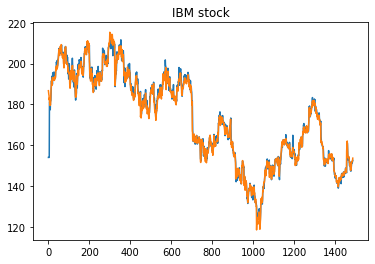

In [318]:
train['predict2'] = result2
train['predict3'] = result3
train['predict4'] = result4
train['predict5'] = result5
# print(predicts)
# fig = px.line(train, x=train.index, y=['open', 'predict5'])
# fig.update_layout(title='IBM\'s stock', xaxis_title='day', yaxis_title='price')
# fig.show()
plt.title("IBM stock")
plt.plot(train.index, train['predict5'])
plt.plot(train.index, train['open'].tolist())
plt.show()